# run parameter space analysis

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.70.211.9:8787/status,
Dashboard: http://10.70.211.9:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.70.211.9:35718,Workers: 0
Dashboard: http://10.70.211.9:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


2024-05-29 20:26:00,722 - bokeh.core.property.validation - ERROR - 'str' object has no attribute 'text'
Traceback (most recent call last):
  File "/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/distributed/utils.py", line 748, in wrapper
    return func(*args, **kwargs)
  File "/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/distributed/dashboard/components/scheduler.py", line 426, in update
    self.root.title.text = title
AttributeError: 'str' object has no attribute 'text'
2024-05-29 20:26:00,764 - bokeh.application.handlers.function - ERROR - 'str' object has no attribute 'text'
Traceback (most recent call last):
  File "/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/distributed/utils.py", line 748, in wrapper
    return func(*args, **kwargs)
  File "/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/distributed/dashboard/components/scheduler.py", line 4214, in status_doc
    clus

KeyError: 'initial_deposits_size'

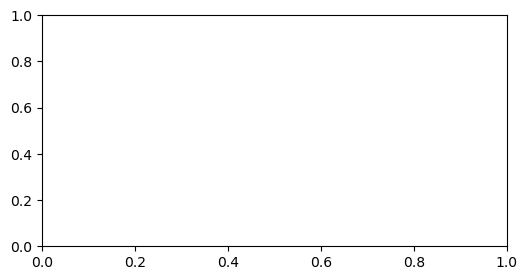

In [4]:
import functions as fct
import pandas as pd
import dynamics as dyn
import numpy as np
import dask
from cluster import new_launch_cluster
import graphics as gx

path = "./results/parameter_space/test/"

dic_default_value = {
    "nb_banks": 50,
    "initial_deposits_size": 1e-9,
    "alpha_init": 0.01,
    "alpha": 0.01,
    "beta_init": 0.5,
    "beta_reg": 0.5,
    "beta_star": 0.5,
    "beta_new": 0.5,
    "gamma_init": 0.03*10,
    "gamma": 0.03,
    "gamma_star": 0.03*10, 
    "gamma_new": 0.03*10, 
    "collateral_value": 1.0,
    "initialization_method": "pareto",
    "alpha_pareto": 1.3,
    "shocks_method": "non-conservative",
    "shocks_law": "normal-mean-reverting",
    "shocks_vol": 0.01,
    "LCR_mgt_opt": True,
    "min_repo_trans_size": 1e-8,
    "loan_tenor": False,
    "new_loans_vol":0,
    "new_loans_mean":1000000e-2/250,
    "end_repo_period":False,
    "nb_steps": int(5e3),
    "path_results": f"{path}runs/",
    "dump_period": int(5e3),
    "plot_period": int(1e2),
    "cp_option": True,
    "heavy_plot": False,  # False to avoid the number of linux node to explode
}

dic_range = {
    "initial_deposits_size": np.logspace(-9, 3, num=50)
    # "nb_banks": np.arange(155, 260, 5),  # 10 to 260
    # "alpha_init": np.arange(0, 0.3, 0.01),
    # "beta_init": np.arange(0, 1, 0.02),
    # "beta_reg": np.arange(0.01, 1, 0.01),
    # "alpha_pareto": np.logspace(0, 1, num=50),
    # "shocks_vol": np.arange(0, 0.30, 0.0010),
    # "min_repo_trans_size": np.logspace(-16, 2, num=50),
}


dic_range_test = {
    "nb_banks": np.arange(1, 3),
    "alpha_init": np.arange(0, 1, 0.1),
    "beta_init": np.arange(0, 1, 0.05),
    "beta_reg": np.arange(0.01, 0.03, 0.01),
    "alpha_pareto": np.logspace(0, 1, num=3),
    "shocks_vol": np.arange(0, 0.30, 0.0025),
    "min_repo_trans_size": np.logspace(-16, 2, num=3),
}

# define the dictionary to be used for the ranges
dic_range = dic_range

# initialize the path
# fct.delete_n_init_path(path)

# build list of the dic_args to be tested
list_dic_args = fct.build_args(dic_default_value, dic_range)

# open a cluster
client, cluster = new_launch_cluster(
    task_memory=19,
    job_walltime="2:00:00",
    max_cpu=fct.get_nb_runs(dic_range),
)

# run with dask distributed
dld_obj = [
    dask.delayed(dyn.single_run)(**dic_args) for dic_args in list_dic_args
]
futures = client.compute(dld_obj)


In [ ]:
futures.result()

In [3]:
client.shutdown()

2024-05-29 20:12:35,201 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


<AxesSubplot: >

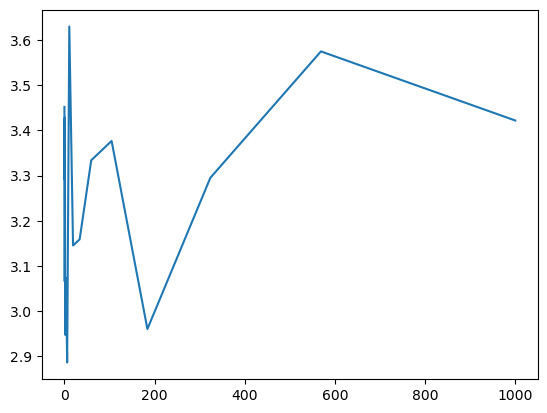

In [15]:
df_network_sensitivity["borrowings ov. deposits tot. network"].loc['initial_deposits_size'].sort_index().plot()

# collect results

In [ ]:
# collect results into df_network_sensitivity
df_network_sensitivity = fct.get_df_network_sensitivity(dic_default_value["path_results"])

# plot results

In [4]:
# plot the sensitivity
df_network_sensitivity = pd.read_csv(f"{dic_default_value['path_results']}df_network_sensitivity.csv", index_col=(0,1))
gx.plot_all_sensitivities(df_network_sensitivity,path=path)